# Notebook: Create Corpus Analysis 

This notebook is used to create plots using our trained model.
<br>**Contributors:** [Nils Hellwig](https://github.com/NilsHellwig/) | [Markus Bink](https://github.com/MarkusBink/)

## Packages

In [1]:
from plots import plot_overall_sentiment, plot_sentiment, plot_sentiment_line_graph_for_each_month, plot_sentiment_line_graph_for_each_month_6_week
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import random

## Parameters

In [2]:
PLOTS_PATH = "../Plots/"

## Code

### Create Dummy Data (Preliminary)

In [3]:
from datetime import datetime, timedelta
N = 1000

# Function to generate random date in 2021
def random_date_2021():
    start = datetime(2021, 1, 1)
    end = datetime(2021, 12, 31)
    int_delta = int((end - start).total_seconds())
    random_second = random.randint(0, int_delta)
    return (start + timedelta(seconds=random_second)).strftime("%Y-%m-%d %H:%M:%S")

# Creating dataframe
sentiment = ['Positive', 'Negative', 'Neutral'] * N * 18
party = ['CDU/CSU', 'SPD', 'AfD', 'FDP', 'Die Linke', 'Grüne'] * 9 * N
dates_array = [random_date_2021() for i in range(N * 18 * 3)]
random.shuffle(sentiment)
random.shuffle(party)
data = {'sentiment': sentiment, 'party': party, 'date': dates_array}
df = pd.DataFrame(data)

# Adding sentiment_value column
df['sentiment_value'] = df.sentiment.map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

In [4]:
df

,sentiment,party,date,sentiment_value
0,Negative,CDU/CSU,2021-10-23 13:14:05,-1
1,Neutral,AfD,2021-12-04 12:10:33,0
2,Neutral,AfD,2021-10-30 08:48:06,0
3,Neutral,AfD,2021-11-13 12:35:02,0
4,Positive,SPD,2021-04-08 13:59:42,1
...,...,...,...,...
53995,Positive,CDU/CSU,2021-05-16 21:35:22,1
53996,Negative,AfD,2021-06-05 15:47:48,-1
53997,Neutral,Grüne,2021-12-02 10:18:25,0
53998,Positive,CDU/CSU,2021-03-25 16:35:18,1


### Create Figure with Bar Charts (Overall Sentiment Distribution)

In [5]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts_list = sentiment_counts.tolist()

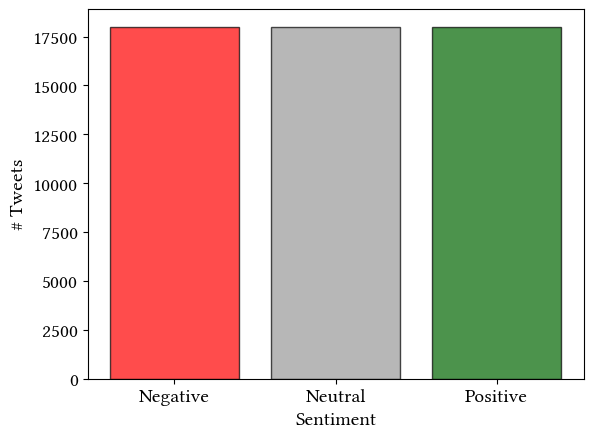

In [6]:
data = [3, 6, 2]
filename = PLOTS_PATH + "overall_sentiment"
plot_overall_sentiment(sentiment_counts_list, filename)

### Create Figure for Percentage Distribution of Sentiment Classes

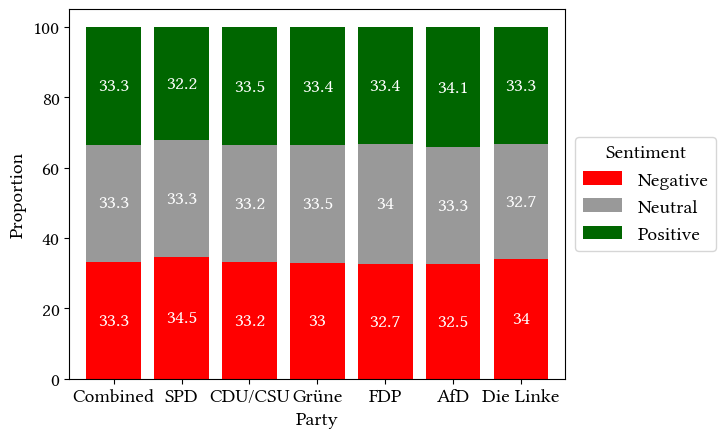

In [7]:
filename = PLOTS_PATH + "proportion_sentiment_parties"
plot_sentiment(df, filename)

### Mean Sentiment per month for the political parties over the whole election year

In [8]:
df['month'] = pd.DatetimeIndex(df['date']).month
month_sentiment_df = df.pivot_table(index=['party', 'month'], values='sentiment_value', aggfunc='mean').reset_index()

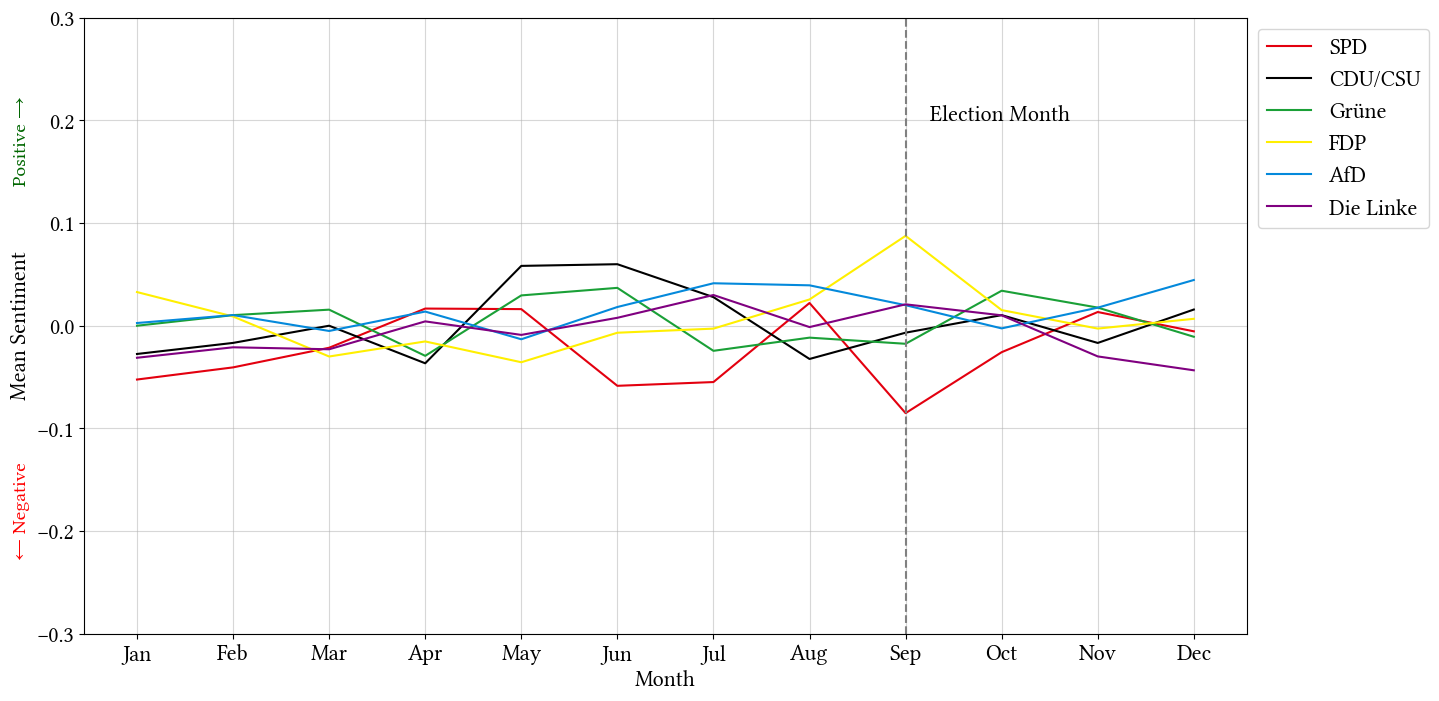

In [9]:
filename = PLOTS_PATH + "mean_sentiment_parties_months"
plot_sentiment_line_graph_for_each_month(month_sentiment_df, filename)

### Create Figure for Percentage Distribution of Sentiment Classes (6-week period before and after the election)

In [10]:
weeks_election_df = df.copy()
weeks_election_df['date'] = pd.to_datetime(weeks_election_df['date'])
weeks_election_df = weeks_election_df[weeks_election_df['date'].between('2021-08-15', '2021-11-07')]
weeks_election_df['week'] = weeks_election_df['date'].dt.isocalendar().week
weeks_election_df['first_day_week'] = weeks_election_df['week'].apply(lambda x: datetime.strptime(f'2021-W{x+1}-0', '%Y-W%U-%w').strftime('%Y-%m-%d'))
weeks_election_df = weeks_election_df.pivot_table(index=['party', 'week', 'first_day_week'], values='sentiment_value', aggfunc='mean').reset_index()

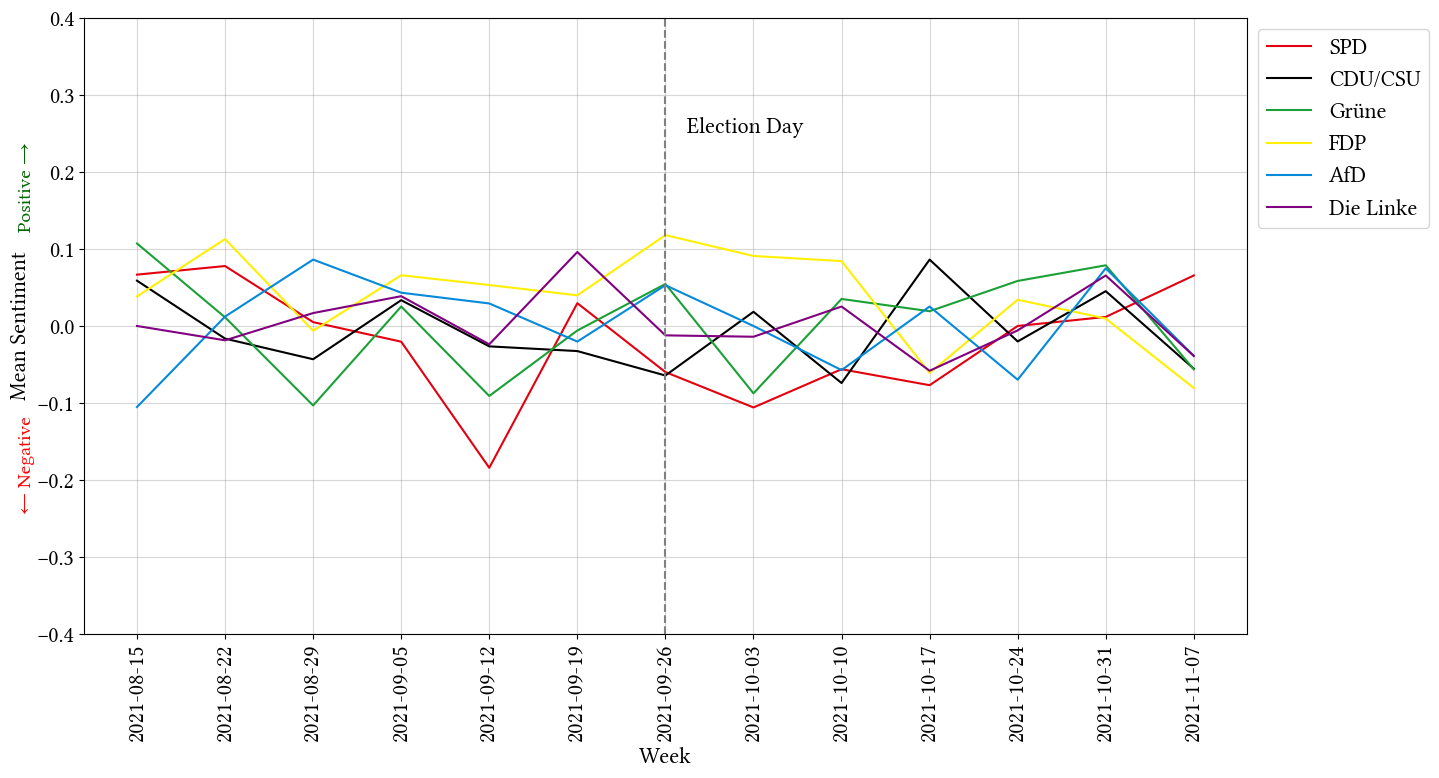

In [11]:
filename = PLOTS_PATH + "mean_sentiment_parties_6_weeks"
plot_sentiment_line_graph_for_each_month_6_week(weeks_election_df, filename)